In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from pytz import timezone
import pytz


data = pd.read_csv("SolarPrediction.csv")
# remove outlier
data = data.drop(6465)
data = data.sort_values(['UNIXTime'], ascending = [True])

column = data["UNIXTime"]
max_value = column.max()
min_value = column.min()
print(data.loc[data['UNIXTime'] == min_value])
print(data.loc[data['UNIXTime'] == max_value])

print(data.head())

        UNIXTime                  Data      Time  Radiation  Temperature  \
7416  1472724008  9/1/2016 12:00:00 AM  00:00:08       2.58           51   

      Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
7416     30.43       103                   77.27  11.25    06:07:00   18:38:00  
         UNIXTime                    Data      Time  Radiation  Temperature  \
24522  1483264501  12/31/2016 12:00:00 AM  23:55:01       1.21           41   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
24522     30.34        81                  215.56    9.0    06:57:00   

      TimeSunSet  
24522   17:54:00  
        UNIXTime                  Data      Time  Radiation  Temperature  \
7416  1472724008  9/1/2016 12:00:00 AM  00:00:08       2.58           51   
7415  1472724310  9/1/2016 12:00:00 AM  00:05:10       2.83           51   
7414  1472725206  9/1/2016 12:00:00 AM  00:20:06       2.16           51   
7413  1472725505  9/1/2016 12:00:00 AM 

In [23]:
hawaii= timezone('Pacific/Honolulu')
data.index =  pd.to_datetime(data['UNIXTime'], unit='s')
data.index = data.index.tz_localize(pytz.utc).tz_convert(hawaii)
data['MonthOfYear'] = data.index.strftime('%m').astype(int)
data['DayOfYear'] = data.index.strftime('%j').astype(int)
data['WeekOfYear'] = data.index.strftime('%U').astype(int)
data['TimeOfDay(h)'] = data.index.hour
data['TimeOfDay(m)'] = data.index.hour*60 + data.index.minute
data['TimeOfDay(s)'] = data.index.hour*60*60 + data.index.minute*60 + data.index.second
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise'], format='%H:%M:%S')
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet'], format='%H:%M:%S')
data['DayLength(s)'] = data['TimeSunSet'].dt.hour*60*60 \
                           + data['TimeSunSet'].dt.minute*60 \
                           + data['TimeSunSet'].dt.second \
                           - data['TimeSunRise'].dt.hour*60*60 \
                           - data['TimeSunRise'].dt.minute*60 \
                           - data['TimeSunRise'].dt.second
data.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)

print(data.head())

                             UNIXTime  Radiation  Temperature  Pressure  \
UNIXTime                                                                  
2016-09-01 00:00:08-10:00  1472724008       2.58           51     30.43   
2016-09-01 00:05:10-10:00  1472724310       2.83           51     30.43   
2016-09-01 00:20:06-10:00  1472725206       2.16           51     30.43   
2016-09-01 00:25:05-10:00  1472725505       2.21           51     30.43   
2016-09-01 00:30:09-10:00  1472725809       2.25           51     30.43   

                           Humidity  WindDirection(Degrees)  Speed  \
UNIXTime                                                             
2016-09-01 00:00:08-10:00       103                   77.27  11.25   
2016-09-01 00:05:10-10:00       103                  153.44   9.00   
2016-09-01 00:20:06-10:00       103                  142.04   7.87   
2016-09-01 00:25:05-10:00       103                  144.12  18.00   
2016-09-01 00:30:09-10:00       103                   

         320.86  13.50           12        366          52            15           950         57001         39420
2016-12-31 15:55:01-10:00  1483235701     485.05           54     30.28        72                  327.03  12.37           12        366          52            15           955         57301         39420
2016-12-31 16:00:02-10:00  1483236002     552.33           54     30.28        77                  328.53   9.00           12        366          52            16           960         57602         39420
2016-12-31 16:05:02-10:00  1483236302     167.44           53     30.29        75                  328.30   9.00           12        366          52            16           965         57902         39420
2016-12-31 16:10:01-10:00  1483236601     105.17           53     30.29        78                  323.85  12.37           12        366          52            16           970         58201         39420
2016-12-31 16:15:04-10:00  1483236904      82.40           52    

In [25]:
data.isnull().sum()

UNIXTime                  0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
MonthOfYear               0
DayOfYear                 0
WeekOfYear                0
TimeOfDay(h)              0
TimeOfDay(m)              0
TimeOfDay(s)              0
DayLength(s)              0
dtype: int64

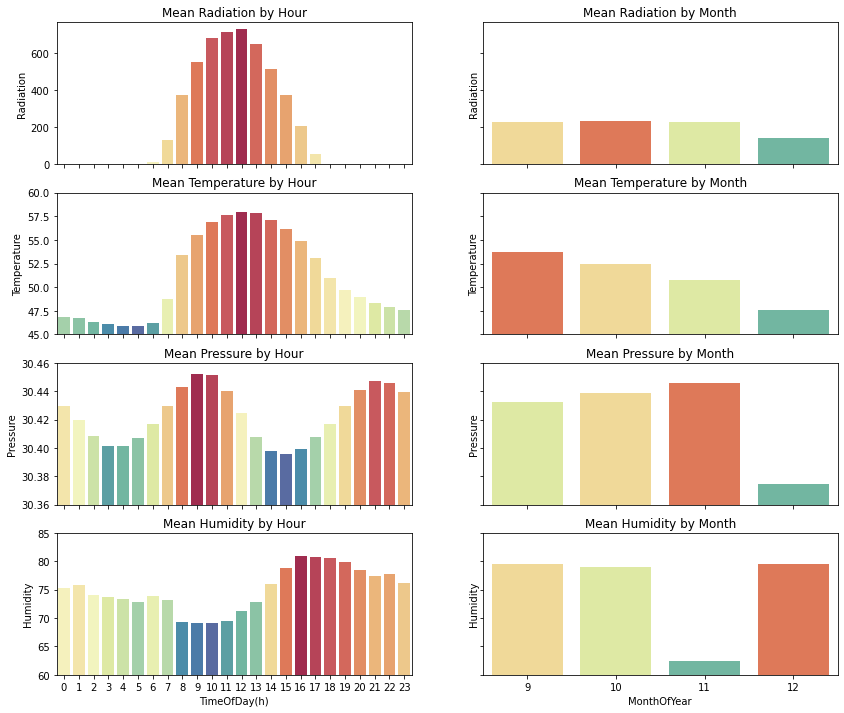

In [26]:
grouped_m=data.groupby('MonthOfYear').mean().reset_index()
grouped_w=data.groupby('WeekOfYear').mean().reset_index()
grouped_d=data.groupby('DayOfYear').mean().reset_index()
grouped_h=data.groupby('TimeOfDay(h)').mean().reset_index()

f, ((axis1, axis2), (axis3, axis4), (axis5, axis6), (axis7, axis8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
axis3.set_ylim(45,60)
axis5.set_ylim(30.36,30.46)
axis7.set_ylim(60,85)

axis1.set_title('Mean Radiation by Hour')
pal = sb.color_palette("Spectral", len(grouped_h))
place = grouped_h['Radiation'].argsort().argsort() 
g = sb.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[place], ax=axis1)
axis1.set_xlabel('')

axis2.set_title('Mean Radiation by Month')
pal = sb.color_palette("Spectral", len(grouped_m))
place = grouped_m['Radiation'].argsort().argsort() 
g = sb.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[place], ax=axis2)
axis2.set_xlabel('')

axis3.set_title('Mean Temperature by Hour')
pal = sb.color_palette("Spectral", len(grouped_h))
place = grouped_h['Temperature'].argsort().argsort() 
g = sb.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[place], ax=axis3)
axis3.set_xlabel('')

axis4.set_title('Mean Temperature by Month')
pal = sb.color_palette("Spectral", len(grouped_m))
place = grouped_m['Temperature'].argsort().argsort() 
g = sb.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[place], ax=axis4)
axis4.set_xlabel('')

axis5.set_title('Mean Pressure by Hour')
pal = sb.color_palette("Spectral", len(grouped_h))
place = grouped_h['Pressure'].argsort().argsort() 
g = sb.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[place], ax=axis5)
axis5.set_xlabel('')

axis6.set_title('Mean Pressure by Month')
pal = sb.color_palette("Spectral", len(grouped_m))
place = grouped_m['Pressure'].argsort().argsort() 
g = sb.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[place], ax=axis6)
axis6.set_xlabel('')

axis7.set_title('Mean Humidity by Hour')
pal = sb.color_palette("Spectral", len(grouped_h))
place = grouped_h['Humidity'].argsort().argsort() 
g = sb.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[place], ax=axis7)

axis8.set_title('Mean Humidity by Month')
pal = sb.color_palette("Spectral", len(grouped_m))
place = grouped_m['Humidity'].argsort().argsort() 
g = sb.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[place], ax=axis8)

plt.show()


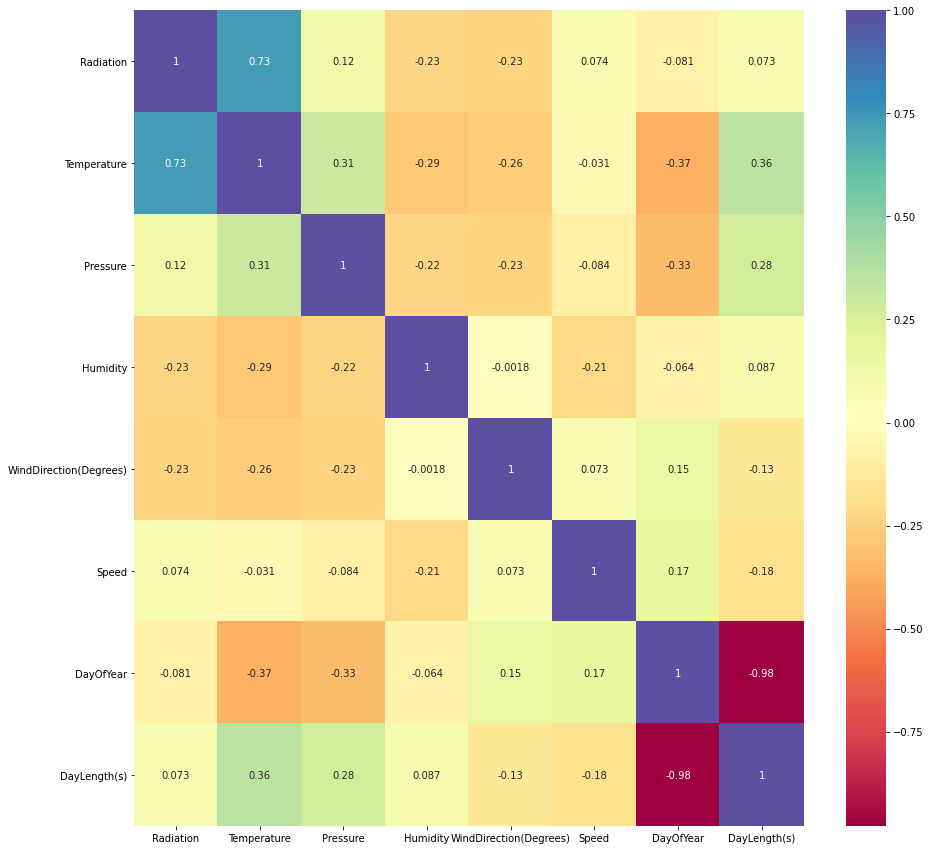

In [27]:
trainData = data.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)

plt.figure(figsize=(15,15))
sns.heatmap(trainData.corr(),annot=True,cmap='Spectral')
plt.show()